In [31]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import gen_features
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [83]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

### Data Cleaning and EDA

In [84]:
df_train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [86]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [87]:
df_train.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

In [88]:
df_test.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
dtype: int64

In [89]:
# Lowered all the columns names

df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')

df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

In [90]:
# I am looking through the data to see if their is columns I can possibly get rid of or set different values to. 
# The pool_qc columns seems to have all nan values so i will be dropping that one. 
# Also going to turn many of the nan into 'none' in some of the obj columns.

In [91]:
# changing all the obj NaN values to 'none'
df_train.fillna(df_train[['alley', 'pool_qc', 'misc_feature', 'fence',
                          'fireplace_qu', 'garage_finish', 'garage_qual',
                         'garage_type', 'bsmtfin_type_1', 'bsmt_qual', 
                         'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_2',
                         'electrical', 'garage_cond', 'mas_vnr_type']].fillna('none'), inplace=True)

In [92]:
# changing the numerical NaN values to 0
df_train.fillna(df_train[['lot_frontage', 'bsmt_half_bath', 'bsmt_full_bath',
                         'garage_area', 'total_bsmt_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
                         'bsmtfin_sf_2', 'garage_cars', 'mas_vnr_area']].fillna(0), inplace=True)

In [93]:
df_test.fillna(df_test[['alley', 'pool_qc', 'misc_feature', 'fence',
                          'fireplace_qu', 'garage_finish', 'garage_qual',
                         'garage_type', 'bsmtfin_type_1', 'bsmt_qual', 
                         'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_2',
                         'electrical', 'garage_cond', 'mas_vnr_type']].fillna('none'), inplace=True)

In [94]:
df_test.fillna(df_test[['lot_frontage', 'bsmt_half_bath', 'bsmt_full_bath',
                         'garage_area', 'total_bsmt_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
                         'bsmtfin_sf_2', 'garage_cars', 'mas_vnr_area']].fillna(0), inplace=True)

In [95]:
# was going to 0 out the garage year build NaN also but decided to just match the year with the same year as the house
df_train['garage_yr_blt'] = df_train.apply(lambda row: row['year_built'] 
                                     if np.isnan(row['garage_yr_blt']) else row['garage_yr_blt'],axis =1)

In [96]:
df_test['garage_yr_blt'] = df_test.apply(lambda row: row['year_built'] 
                                     if np.isnan(row['garage_yr_blt']) else row['garage_yr_blt'],axis =1)

In [97]:
df_train.head(5)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,none,IR1,Lvl,...,0,0,none,none,none,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,none,IR1,Lvl,...,0,0,none,none,none,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,none,Reg,Lvl,...,0,0,none,none,none,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,none,Reg,Lvl,...,0,0,none,none,none,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,none,IR1,Lvl,...,0,0,none,none,none,0,3,2010,WD,138500


In [98]:
df_test.head(5)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,none,none,none,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,none,IR1,Lvl,...,0,0,0,none,none,none,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,none,IR1,Lvl,...,0,0,0,none,none,none,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,none,Reg,Lvl,...,0,0,0,none,none,none,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,none,IR1,Lvl,...,0,185,0,none,none,none,0,7,2009,WD


In [99]:
df_test.isnull().sum().sum()

0

In [100]:
df_train.isnull().sum().sum()

0

<Figure size 720x720 with 0 Axes>

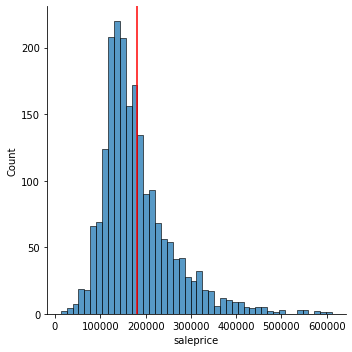

In [101]:
# looking at graphs to see the correlation between sales price
plt.figure(figsize=(10,10))
sns.displot(df_train['saleprice'])
plt.axvline(df_train['saleprice'].mean(), color='r');

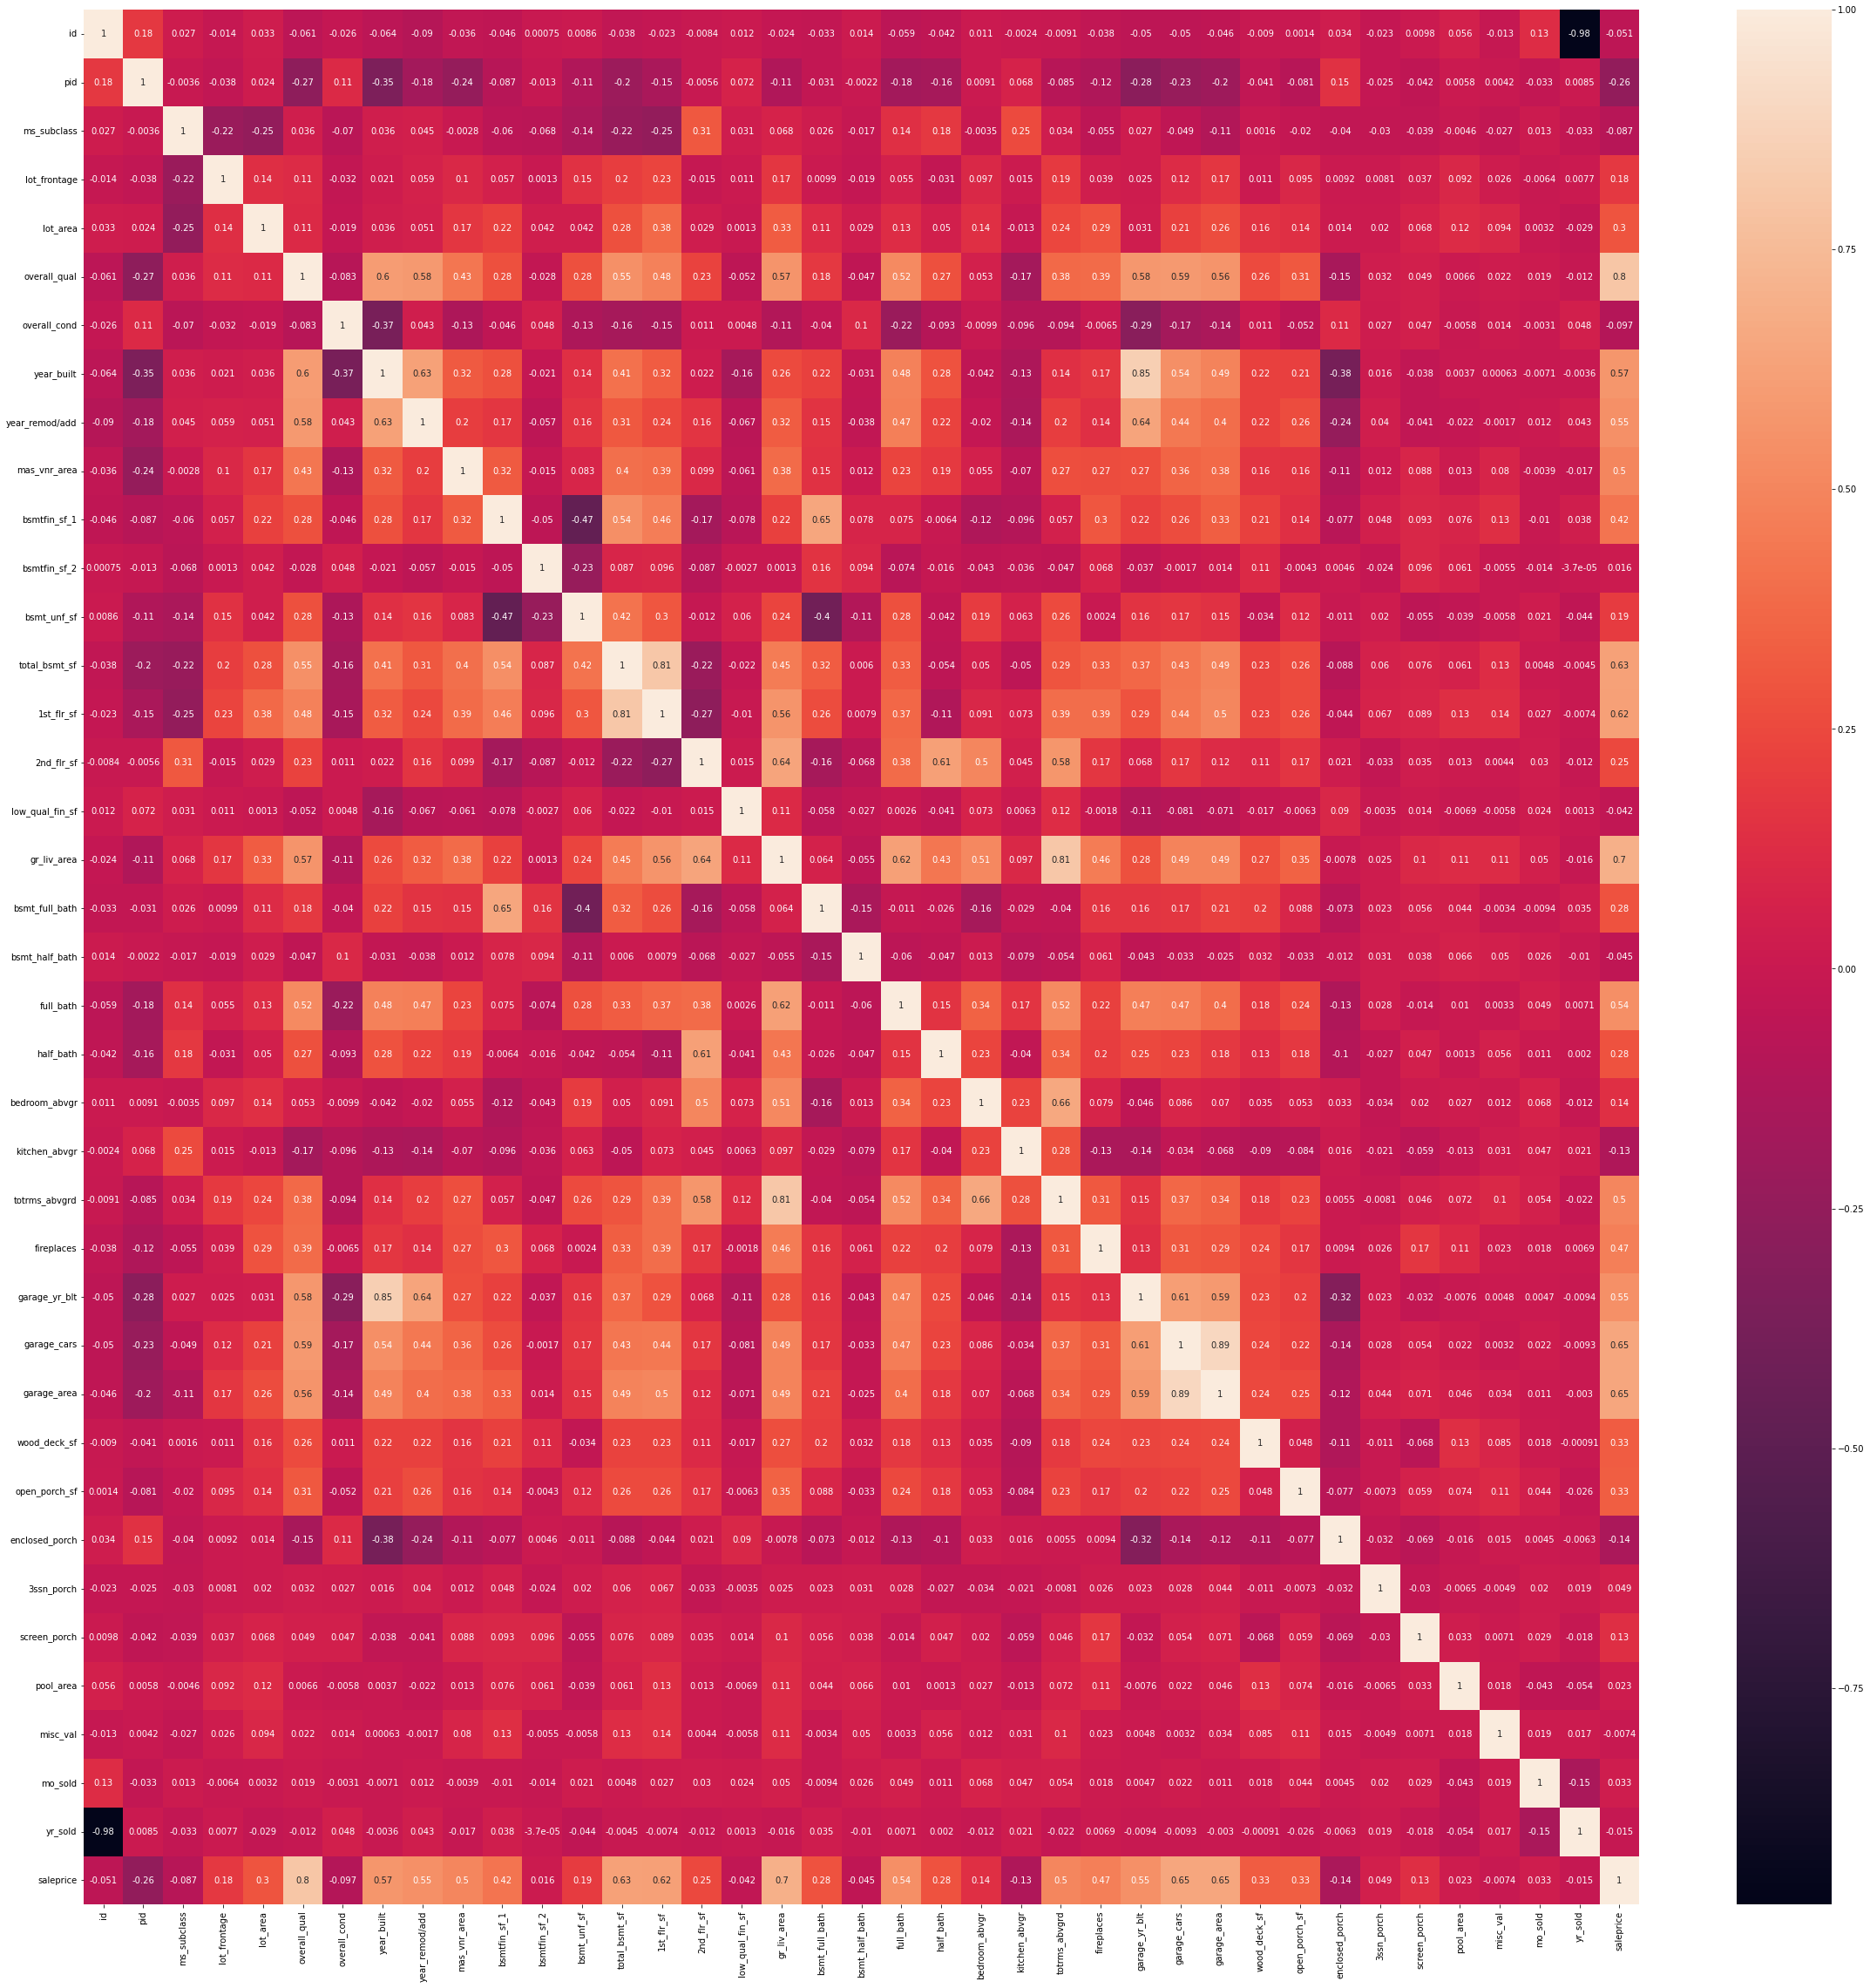

In [102]:
plt.figure(figsize = (40,40))
sns.heatmap(df_train.corr(), annot=True);

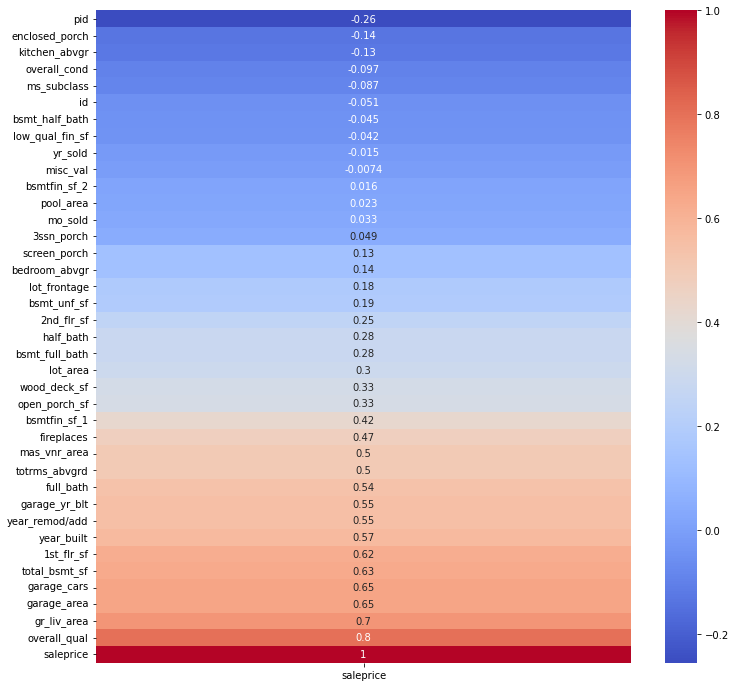

In [103]:
plt.figure(figsize = (12,12))

sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice'), annot=True,cmap ='coolwarm');

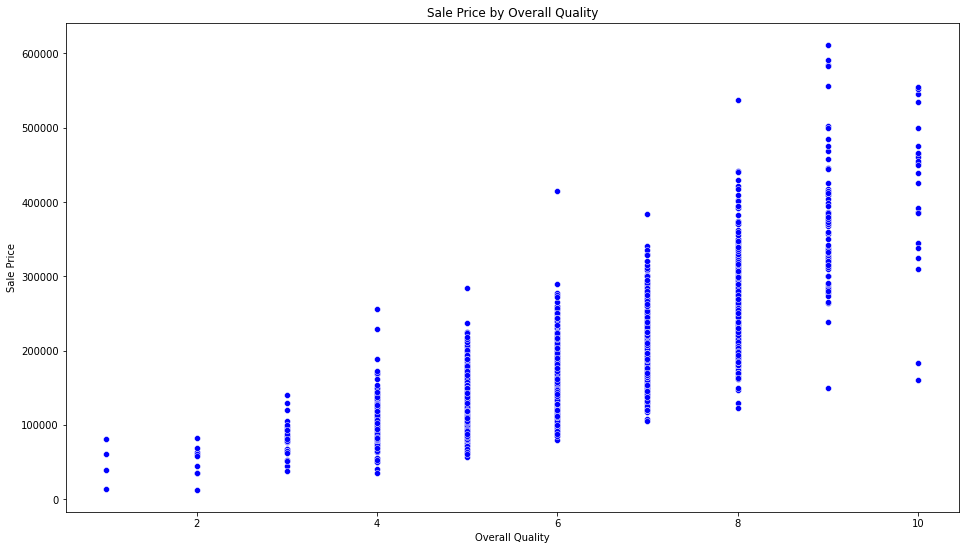

In [121]:
plt.figure(figsize=(16,9))
plt.title('Sale Price by Overall Quality')

sns.scatterplot(
    data=df_train,
    x='overall_qual', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price');

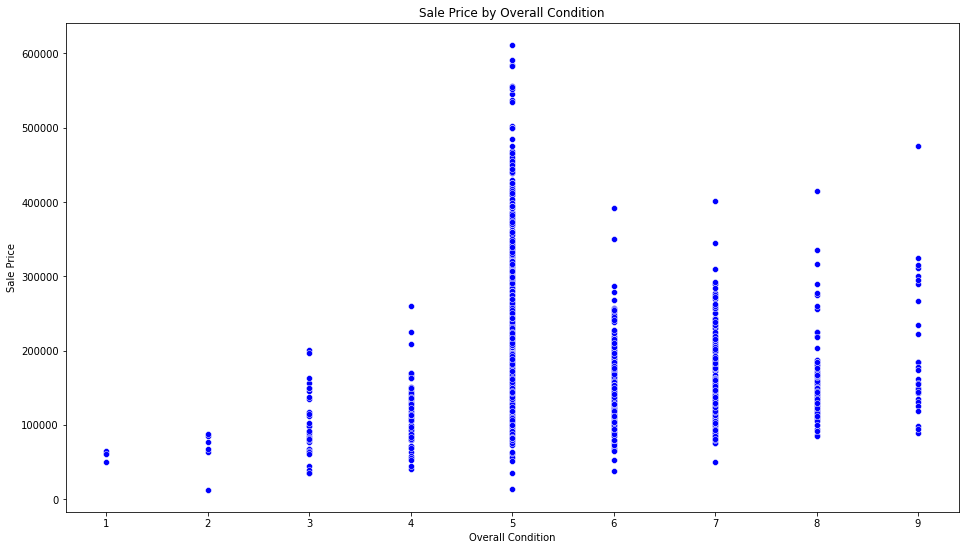

In [122]:
plt.figure(figsize=(16,9))
plt.title('Sale Price by Overall Condition')

sns.scatterplot(
    data=df_train,
    x='overall_cond', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Overall Condition')
plt.ylabel('Sale Price');

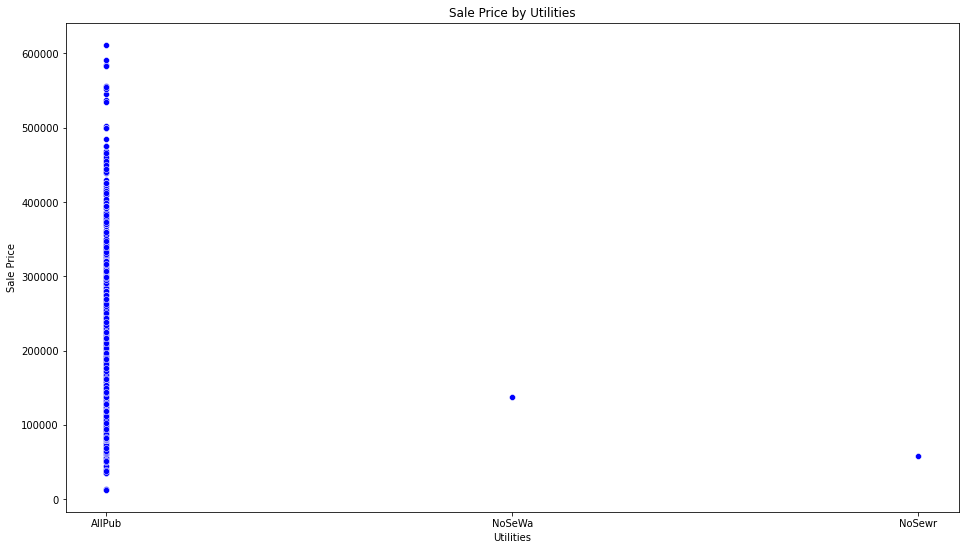

In [126]:
plt.figure(figsize=(16,9))
plt.title('Sale Price by Utilities')

sns.scatterplot(
    data=df_train,
    x='utilities', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Utilities')
plt.ylabel('Sale Price');

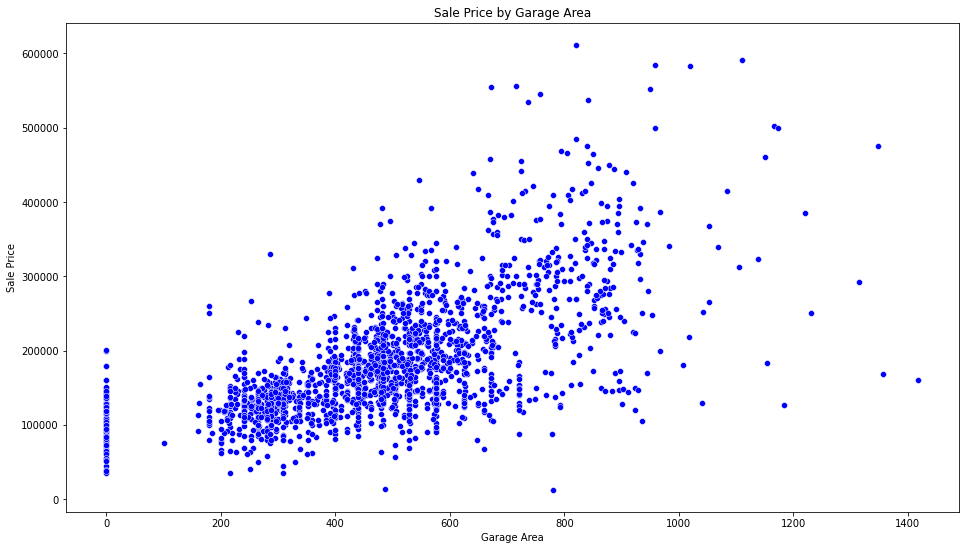

In [133]:
plt.figure(figsize=(16,9))
plt.title('Sale Price by Garage Area')

sns.scatterplot(
    data=df_train,
    x='garage_area', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Garage Area')
plt.ylabel('Sale Price');

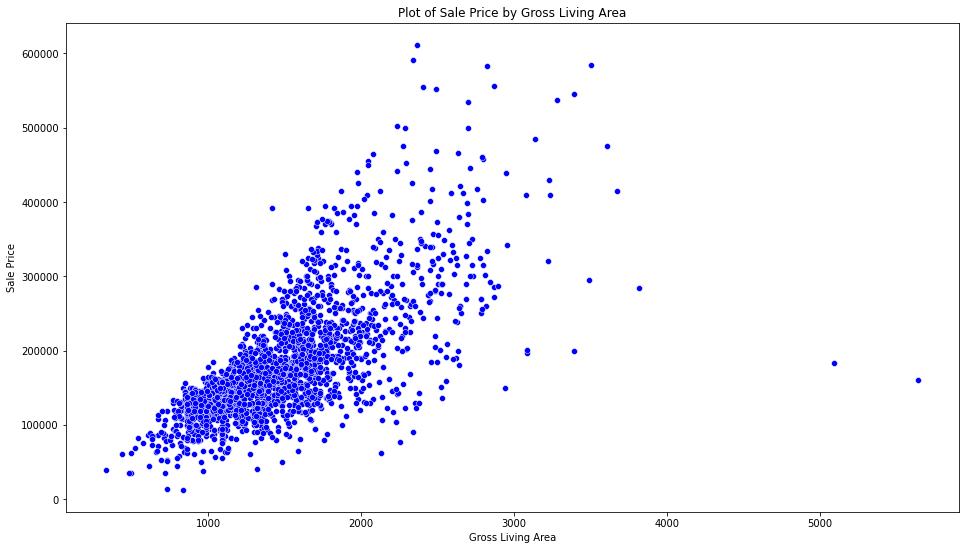

In [127]:
plt.figure(figsize=(16,9))
plt.title('Plot of Sale Price by Gross Living Area')

sns.scatterplot(
    data=df_train,
    x='gr_liv_area', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Gross Living Area')
plt.ylabel('Sale Price');

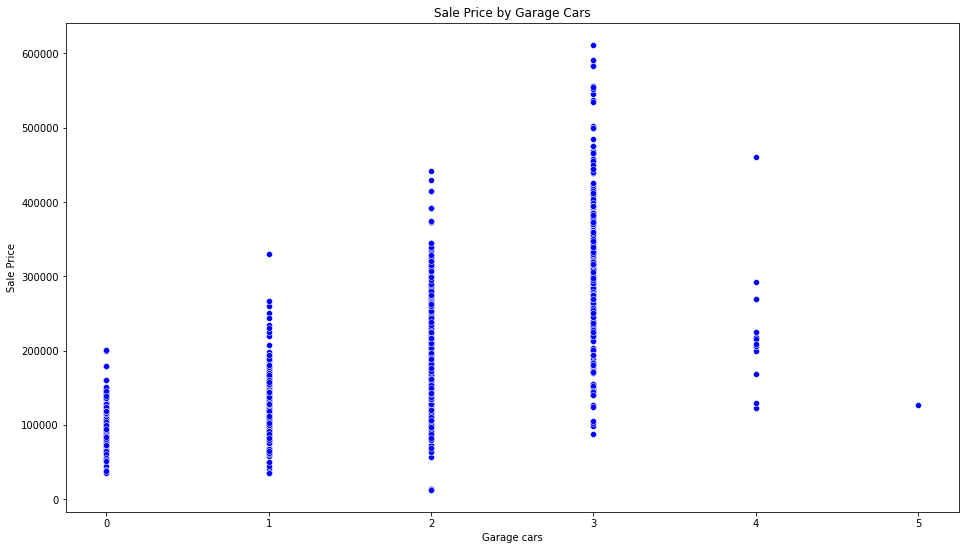

In [132]:
plt.figure(figsize=(16,9))
plt.title('Sale Price by Garage Cars')

sns.scatterplot(
    data=df_train,
    x='garage_cars', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Garage cars')
plt.ylabel('Sale Price');

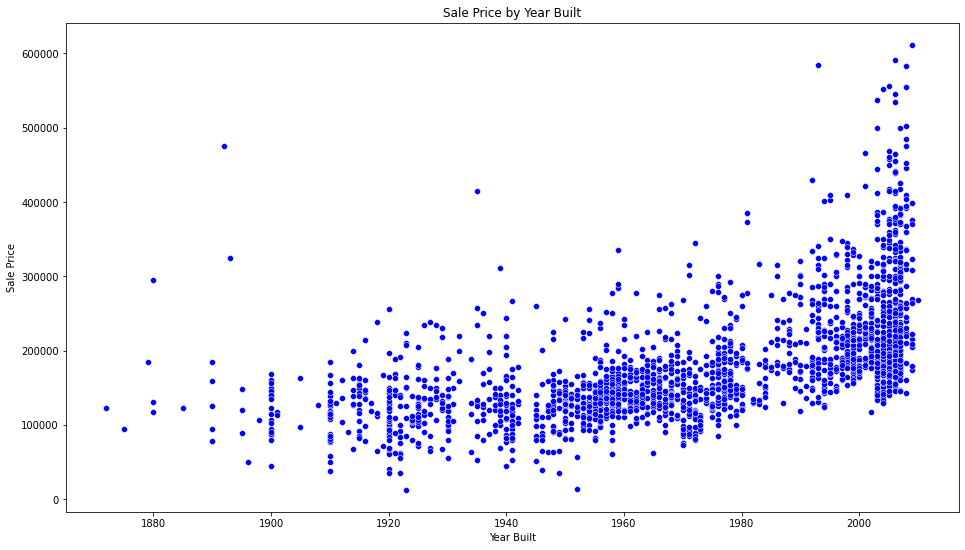

In [131]:
plt.figure(figsize=(16,9))
plt.title('Sale Price by Year Built')

sns.scatterplot(
    data=df_train,
    x='year_built', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Year Built')
plt.ylabel('Sale Price');

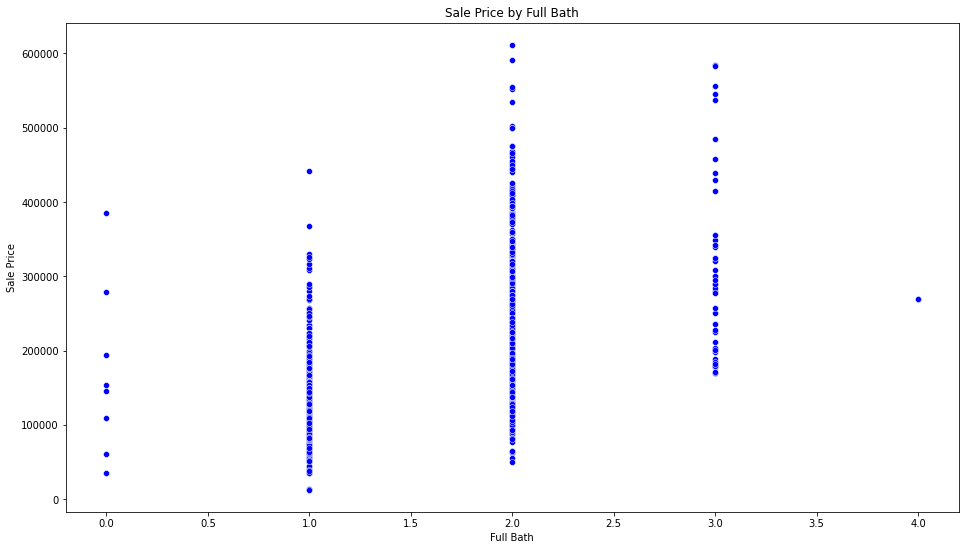

In [130]:
plt.figure(figsize=(16,9))
plt.title('Sale Price by Full Bath')

sns.scatterplot(
    data=df_train,
    x='full_bath', 
    y='saleprice', 
    color='blue',
    alpha=1
)

plt.xlabel('Full Bath')
plt.ylabel('Sale Price');

In [28]:
# dropping columns that seemed to have very little relation with saleprice and/or had columns with all 0

df_train.drop(columns=['pid', 'ms_subclass', 'overall_cond', 'bsmtfin_sf_2', 
                     'low_qual_fin_sf', 'bsmt_half_bath', 'kitchen_abvgr', 'enclosed_porch',
                     'pool_area', 'pool_qc', 'misc_val', 'mo_sold', 'yr_sold', 'utilities', 'condition_2'], inplace=True)

In [29]:
df_test.drop(columns=['pid', 'ms_subclass', 'overall_cond', 'bsmtfin_sf_2', 
                     'low_qual_fin_sf', 'bsmt_half_bath', 'kitchen_abvgr', 'enclosed_porch',
                     'pool_area', 'pool_qc', 'misc_val', 'mo_sold', 'yr_sold', 'utilities', 'condition_2'], inplace=True)

In [30]:
df_test.columns

Index(['id', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley',
       'lot_shape', 'land_contour', 'lot_config', 'land_slope', 'neighborhood',
       'condition_1', 'bldg_type', 'house_style', 'overall_qual', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'bsmt_full_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       'garage_area', 'garage_qual', 'garage_cond', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', '3ssn_porch', 'scree

In [31]:
df_train.columns

Index(['id', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley',
       'lot_shape', 'land_contour', 'lot_config', 'land_slope', 'neighborhood',
       'condition_1', 'bldg_type', 'house_style', 'overall_qual', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'bsmt_full_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
       'garage_area', 'garage_qual', 'garage_cond', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', '3ssn_porch', 'scree

In [32]:
# making an "categorical" and "numeric" 
numeric = df_train.select_dtypes(include = [np.number])

categorical = df_train.select_dtypes(include = 'object')

#https://stackoverflow.com/questions/58075048/separate-numerical-and-categorical-variable-in-pandas-datframe

In [33]:
# OneHotEncode
feature = gen_features(columns = categorical.columns.tolist(), classes=[LabelBinarizer])
mapping = DataFrameMapper(feature, df_out=True)
df_trans = mapping.fit_transform(categorical)

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [34]:
# new df to do testing on

df_train = pd.concat([numeric, df_trans], axis=1)

In [35]:
numeric = df_test.select_dtypes(include = [np.number])

categorical = df_test.select_dtypes(include = 'object')

In [36]:
feature = gen_features(columns = categorical.columns.tolist(), classes=[LabelBinarizer])
mapping = DataFrameMapper(feature, df_out=True)
df_feature = mapping.fit_transform(categorical)

In [37]:
df_test = pd.concat([numeric, df_feature], axis=1)

In [38]:
df_test = df_test.drop(columns = ['electrical_none',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'heating_Floor',
 'kitchen_qual_Po',
 'mas_vnr_type_CBlock',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'sale_type_VWD'])

In [40]:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*obj*|2019 ACT/SAT|States in the United States.| 
|**participation_sat**|*float*|2019 SAT|2019 SAT participation rates through all 50 states in the United States.|
|**participation_act**|*float*|2019 ACT|2019 ACT participation rates through all 50 states in the United States.| 
|**composite_score_sat**|*float*|2019 SAT|2019 SAT scores through all 50 states in the United States.| 
|**composite_score_sat**|*float*|2019 ACT|2019 ACT scores through all the 50 states in the United States.| 
|**region**|*obj*|2019 ACT|States seperated by regions.| 

SyntaxError: invalid syntax (3935764280.py, line 1)

|Feature|Type|Dataset|                                 
|---|---|---|
|**ID**|*int*|train|
|**PID**|*int*|train|
|**MS Subclass**|*int*|train| 
|**MS Zoning**|*obj*|train| 
|**Lot Frontage**|*float*|train| 
|**Lot Area**|*int*|train| 
|**Street**|*obj*|train|
|**Alley**|*obj*|train|
|**Lot Shape**|*obj*|train| 
|**Land Contour**|*obj*|train| 
|**Utilies**|*obj*|train| 
|**Lot Config**|*obj*|train| 
|**Land Slopes**|*obj*|train|
|**Neighborhood**|*obj*|train|
|**Condition 1**|*obj*|train| 
|**Condition 2**|*obj*|train| 
|**Bldg Type**|*obj*|train| 
|**House Style**|*obj*|train|
|**Overall Qual**|*int*|train|
|**Overall Cond**|*int*|train|
|**Year Built**|*int*|train| 
|**Year Remod/Add**|*int*|train| 
|**Roof Style**|*obj*|train| 
|**Roof Matl**|*obj*|train| 
|**Exterior 1st**|*obj*|train|
|**Exterior 2nd**|*obj*|train|
|**Mas Vnr Type**|*obj*|train| 
|**Mas Vnr Area**|*float*|train| 
|**Exter Qual**|*obj*|train| 
|**Exter Cond**|*obj*|train| 
|**Foundation**|*obj*|train|
|**Bsmt Qual**|*obj*|train|
|**Bsmt Cond**|*obj*|train| 
|**Bsmt Exposure**|*obj*|train| 
|**BsmtFin Type 1**|*obj*|train| 
|**BsmtFin SF 1**|*float*|train| 
|**BsmtFin Type 2**|*obj*|train|
|**BsmtFin SF 2**|*float*|train|
|**Bsmt Unf SF**|*float*|train| 
|**Total Bsmt SF**|*float*|train| 
|**Heating**|*obj*|train| 
|**Heating QC**|*obj*|train| 
|**Central Air**|*obj*|train|
|**Electrical**|*obj*|train|
|**1st Flr SF**|*int*|train| 
|**2nd Flr SF**|*obj*|train| 
|**Low Qual Fin SF**|*float*|train| 
|**Gr Liv Area**|*int*|train| 
|**Bsmt Full Bath**|*int*|train|
|**Bsmt Half Bath**|*int*|train|
|**Full Bath**|*int*|train| 
|**Half Bath**|*obj*|train| 
|**Bedroom AbvGr**|*float*|train| 
|**Kitchen AbvGr**|*int*|train|
|**Kitchen Qual**|*int*|train|
|**TotRms AbvGrd**|*int*|train|
|**Functional**|*int*|train| 
|**Fireplaces**|*obj*|train| 
|**Fireplaces Qu**|*float*|train| 
|**Garage Type**|*int*|train| 
|**Garage Yr Blt**|*obj*|train|
|**Garage Finish**|*int*|train|
|**Garage Cars**|*int*|train| 
|**Garage Area**|*obj*|train| 
|**Garage Qual**|*float*|train| 
|**Garage Cond**|*int*|train| 
|**Pave Drive**|*int*|train|
|**Wood Deck SF**|*int*|train|
|**Open Porch SF**|*int*|train| 
|**Enclosed Porch**|*obj*|train| 
|**3Ssn Porch**|*float*|train| 
|**Screen Porch**|*int*|train| 
|**Pool Area**|*obj*|train| 
|**Pool QC**|*float*|train| 
|**Fence**|*int*|train| 
|**Misc Feature**|*int*|train|
|**Misc Val**|*int*|train|
|**Mo Sold**|*int*|train| 
|**Yr Sold**|*obj*|train| 
|**Sale Type**|*float*|train| 
|**SalePrice**|*int*|train| 

### Train Test Split

In [41]:
X = df_train.drop(columns = ['saleprice','bsmt_cond_Ex',
 'bsmt_cond_Po',
 'electrical_Mix',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'functional_Sal',
 'functional_Sev',
 'garage_qual_Ex',
 'heating_OthW',
 'heating_Wall',
 'heating_qc_Po',
 'misc_feature_Elev',
 'misc_feature_TenC',
 'ms_zoning_A (agr)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'roof_matl_ClyTile',
 'roof_matl_Membran'
                            ])

y = df_train['saleprice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [42]:
X_train.shape, X_val.shape, df_test.shape

((1640, 256), (411, 256), (878, 256))

In [43]:
X_train.columns

Index(['id', 'lot_frontage', 'lot_area', 'overall_qual', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmt_unf_sf',
       'total_bsmt_sf',
       ...
       'misc_feature_none', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=256)

In [44]:
df_test.columns

Index(['id', 'lot_frontage', 'lot_area', 'overall_qual', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmt_unf_sf',
       'total_bsmt_sf',
       ...
       'misc_feature_none', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=256)

In [45]:
set(df_train.columns) - set(df_test.columns)

{'bsmt_cond_Ex',
 'bsmt_cond_Po',
 'electrical_Mix',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'functional_Sal',
 'functional_Sev',
 'garage_qual_Ex',
 'heating_OthW',
 'heating_Wall',
 'heating_qc_Po',
 'misc_feature_Elev',
 'misc_feature_TenC',
 'ms_zoning_A (agr)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'roof_matl_ClyTile',
 'roof_matl_Membran',
 'saleprice'}

In [46]:
set(df_test.columns) - set(df_train.columns)

set()

In [47]:
X_train.columns

Index(['id', 'lot_frontage', 'lot_area', 'overall_qual', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmt_unf_sf',
       'total_bsmt_sf',
       ...
       'misc_feature_none', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=256)

### Feature Engineering

In [48]:
poly = PolynomialFeatures(degree=2,
                        interaction_only=True,
                        include_bias=True)

In [49]:
tr_id = X_train['id']
val = X_val['id']

X_train.drop(columns=['id'], inplace=True)
X_val.drop(columns=['id'], inplace=True)

In [50]:
X_train = poly.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = poly.get_feature_names_out())

X_val = poly.transform(X_val)
X_val = pd.DataFrame(X_val, columns = poly.get_feature_names_out())

### Scaling Data

In [51]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_train = pd.DataFrame(Xs_train, columns = ss.get_feature_names_out())

Xs_val = pd.DataFrame(ss.transform(X_val), columns = ss.get_feature_names_out())

### Modeling

In [52]:
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression()

In [53]:
lr.score(Xs_train, y_train)

0.9999850867358904

In [54]:
lr.score(Xs_val, y_val)

-2.3518567460857243e+24

In [55]:
# the target value has a target error of + or - $306 per saleprice
mean_squared_error(y_train, lr.predict(Xs_train))*0.05

306.5158190782533

In [56]:
mean_squared_error(y_val, lr.predict(Xs_val))**0.5

1.206854347934531e+17

In [57]:
cross_val_score(lr, Xs_train, y_train).mean()

-5.3961992916284906e+20

### Ridge

In [58]:
ridge = RidgeCV(alphas = np.logspace(0, 5 , 100))

In [59]:
ridge.fit(Xs_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]))

In [60]:
ridge.alpha_

17475.28400007683

In [61]:
ridge.score(Xs_train, y_train)

0.9627137044719916

In [62]:
ridge.score(Xs_val, y_val)

0.8636850227294746

In [63]:
mean_squared_error(y_train, ridge.predict(Xs_train))**0.5

15326.435336486276

In [64]:
mean_squared_error(y_val, ridge.predict(Xs_val))**0.5

29055.022406814227

### Lasso

In [65]:
lasso = LassoCV(alphas = np.arange(0.01, 10, 100))

In [66]:
lasso.fit(Xs_train, y_train)

LassoCV(alphas=array([0.01]))

In [67]:
lasso.alpha_

0.01

In [68]:
lasso.score(Xs_train, y_train)

0.9998741497931923

In [69]:
lasso.score(Xs_val, y_val)

0.7092798669400271

In [70]:
cross_val_score(lasso, Xs_train, y_train)

array([0.72912236, 0.70889095, 0.57510511, 0.59846574, 0.73865407])

### Prediction

In [71]:
test_id = df_test['id']

In [72]:
df_train.shape, df_test.shape

((2051, 277), (878, 256))

In [73]:
df_test = poly.transform(df_test.drop(columns = 'id'))
df_test = pd.DataFrame(df_test, columns = poly.get_feature_names_out())

In [267]:
Xs_test = pd.DataFrame(ss.transform(df_test), columns = ss.get_feature_names_out())

In [269]:
rg = Ridge(alpha = ridge.alpha_)

rg.fit(Xs_train, y_train)

Ridge(alpha=17475.28400007683)

In [273]:
preds = rg.predict(Xs_test)

preds = pd.DataFrame(preds, columns = ['SalePrice'])

In [274]:
preds.insert(loc = 0, column = 'Id', value = test_id)

In [275]:
preds.head()

,Id,SalePrice
0,2658,96214.030404
1,2718,167214.134826
2,2414,216398.133331
3,1989,106429.917508
4,625,184507.946864


In [276]:
preds.shape

(878, 2)

In [281]:
preds.to_csv('../project-2/submissions/ridge_1.csv', index = False)